# DSCT4900 Spring 2021 - CHOW Hau Cheung Jasper 20589533



## Imports

In [1]:
import time
import os
import random
import math

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


%matplotlib inline

## Load data (for Google Colab only)
If you are using google colab, this code helps you easily load data.

**Remember to change runtime type to GPU if you are using google colab.**

Please store the dataset folder ([data](https://drive.google.com/drive/folders/1_0Doj4SmfqSNSm9CeMqNlagfb4APLQfq?usp=sharing)) to an appropriate location first.

In [2]:
assert os.environ['COLAB_GPU'], 'Make sure to select GPU from Edit > Notebook settings > Hardware accelerator'
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Then link the `data` in google drive to `./data`

In [3]:
!rm -f data
!ln -s '/content/drive/My Drive/3-2/DSCT4900' data

## With L2 loss
Q1 and Q2

[[93  6]
 [ 9 91]]


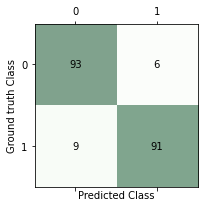

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

# separate data into train and test datasets
ztrain = pd.read_csv("data/card_train_DSCT4900.csv")
ztest = pd.read_csv("data/card_test_DSCT4900.csv")

# trainX refers to training data. testX refers to training data.
# trainY is the corresponding labels of training data. testY is the corresponding labels for test data
trainX = ztrain.drop("Class", 1)
trainY = ztrain["Class"]
testX = ztest.drop("Class", 1)
testY = ztest["Class"]

ss = StandardScaler()
# make sure trainX and testX are in the same scale after transformation
trainX_std = ss.fit_transform(trainX)
testX_std = ss.transform(testX)

# fit data to logistic regression model
lr = LogisticRegression(solver = 'liblinear', penalty='l2').fit(trainX_std, trainY)
predictedY = lr.predict(testX_std)
cfmat1 = confusion_matrix(y_true = testY, y_pred = predictedY)
print(cfmat1)

# print confusion matrix
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(cfmat1, cmap=plt.cm.Greens, alpha=0.5)
for i in range(cfmat1.shape[0]):
  for j in range(cfmat1.shape[1]):
    ax.text(x=j, y=i, s=cfmat1[i,j], va="center", ha="center")
plt.xlabel("Predicted Class")
plt.ylabel("Ground truth Class")
plt.show()


              precision    recall  f1-score   support

           0       0.91      0.94      0.93        99
           1       0.94      0.91      0.92       100

    accuracy                           0.92       199
   macro avg       0.92      0.92      0.92       199
weighted avg       0.93      0.92      0.92       199



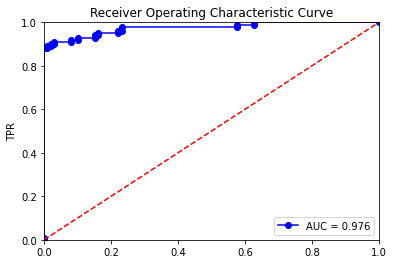

In [5]:
print(classification_report(testY, predictedY))

# tpr = true positive rate, fpr = false positive rate
fpr, tpr, thresholds = roc_curve(testY, lr.predict_proba(testX_std)[:,1])
roc_auc = auc(fpr, tpr)

# plot the ROC curve with AUC
plt.title("Receiver Operating Characteristic Curve")
plt.plot(fpr, tpr, 'b', marker = "o", label="AUC = %0.3f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel("FPR")
plt.ylabel("TPR")
plt.show()

## With L1 loss
Q3

[[85 14]
 [ 9 91]]


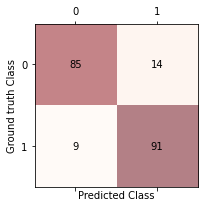

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        99
           1       0.87      0.91      0.89       100

    accuracy                           0.88       199
   macro avg       0.89      0.88      0.88       199
weighted avg       0.89      0.88      0.88       199



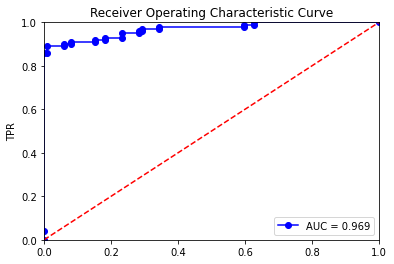

In [6]:
lr = LogisticRegression(solver = 'liblinear', penalty='l1').fit(trainX_std, trainY)
predictedY = lr.predict(testX_std)
cfmat1 = confusion_matrix(y_true = testY, y_pred = predictedY)
print(cfmat1)

# print confusion matrix
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(cfmat1, cmap=plt.cm.Reds, alpha=0.5)
for i in range(cfmat1.shape[0]):
  for j in range(cfmat1.shape[1]):
    ax.text(x=j, y=i, s=cfmat1[i,j], va="center", ha="center")
plt.xlabel("Predicted Class")
plt.ylabel("Ground truth Class")
plt.show()

print(classification_report(testY, predictedY))

# tpr = true positive rate, fpr = false positive rate
fpr, tpr, thresholds = roc_curve(testY, lr.predict_proba(testX_std)[:,1])
roc_auc = auc(fpr, tpr)

# plot the ROC curve with AUC
plt.title("Receiver Operating Characteristic Curve")
plt.plot(fpr, tpr, 'b', marker = "o", label="AUC = %0.3f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel("FPR")
plt.ylabel("TPR")
plt.show()